<a href="https://colab.research.google.com/github/sesmael/ECGR-4105/blob/main/copy_of_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning rate: 0.1, Final theta: [ 5.92794892 -2.03833663], Final cost: 0.9849930825405946


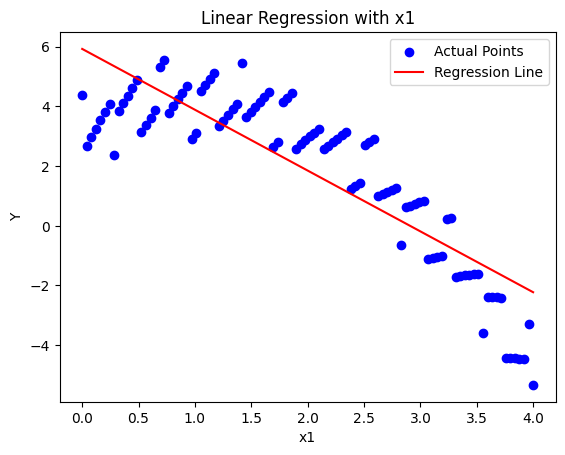

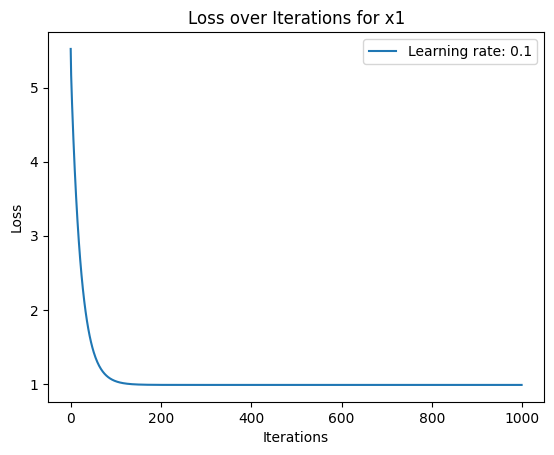

Learning rate: 0.07, Final theta: [ 5.92794797 -2.03833626], Final cost: 0.9849930825407129


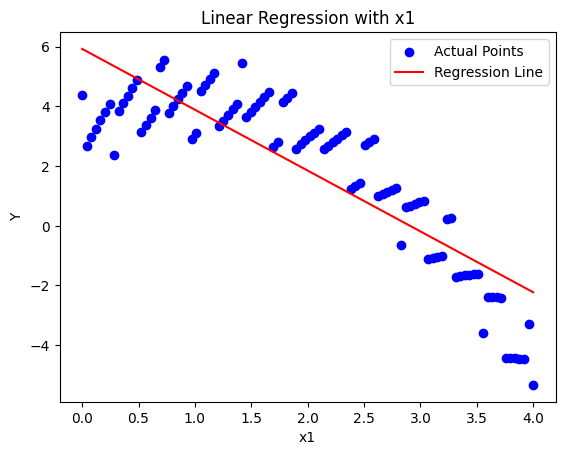

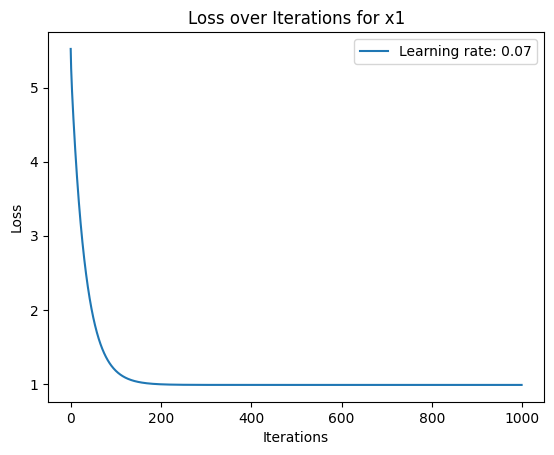

Learning rate: 0.01, Final theta: [ 5.29294728 -1.79119079], Final cost: 1.0366648249472639


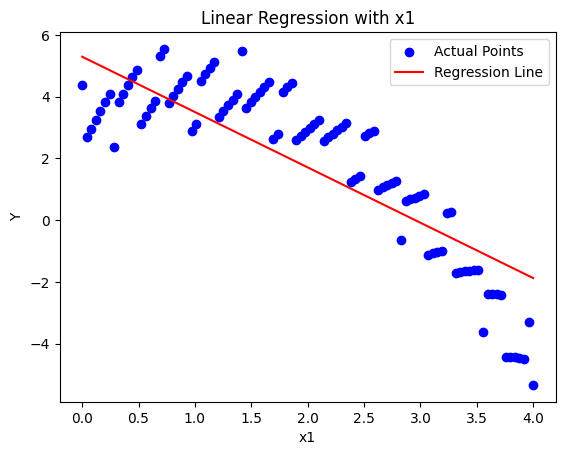

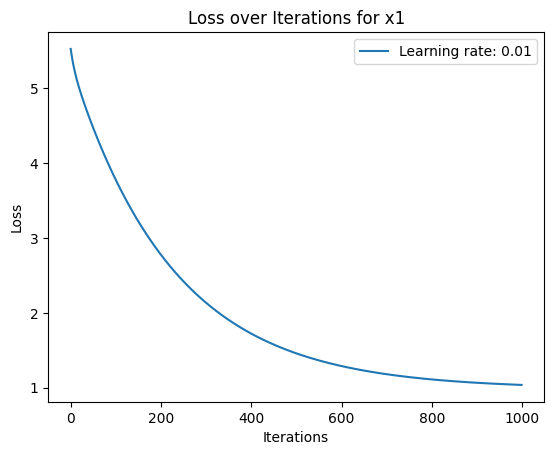

Learning rate: 0.1, Final theta: [0.73606043 0.55760761], Final cost: 3.5993660181680416


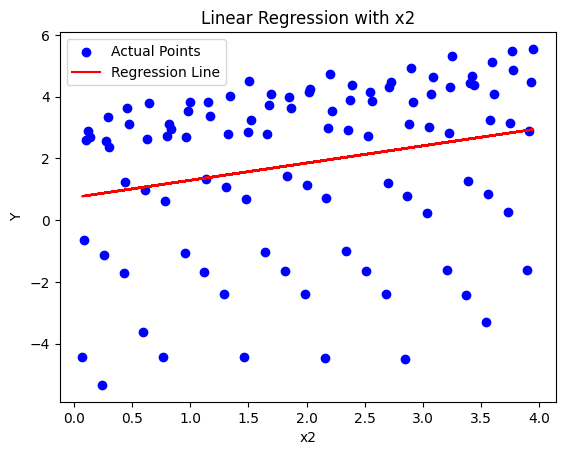

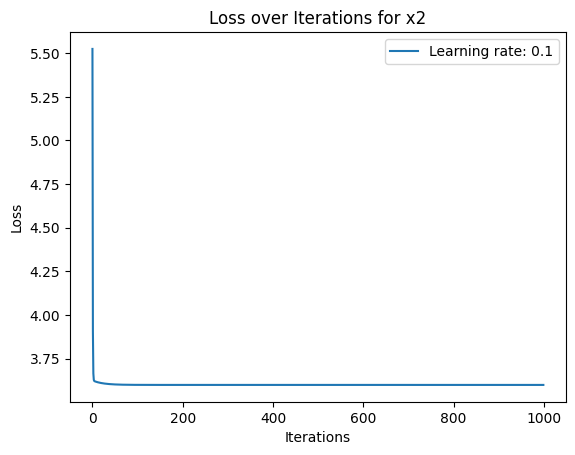

Learning rate: 0.07, Final theta: [0.73606036 0.55760764], Final cost: 3.599366018168043


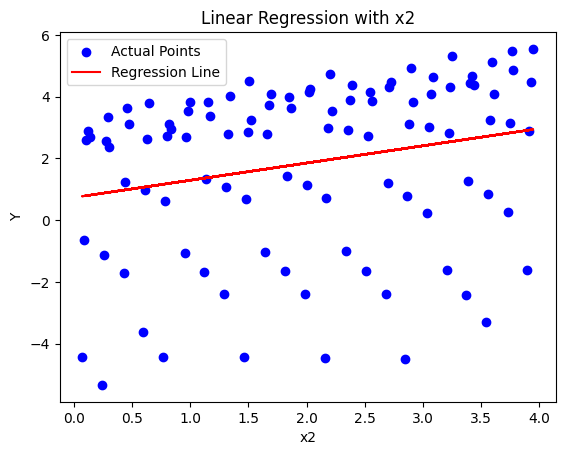

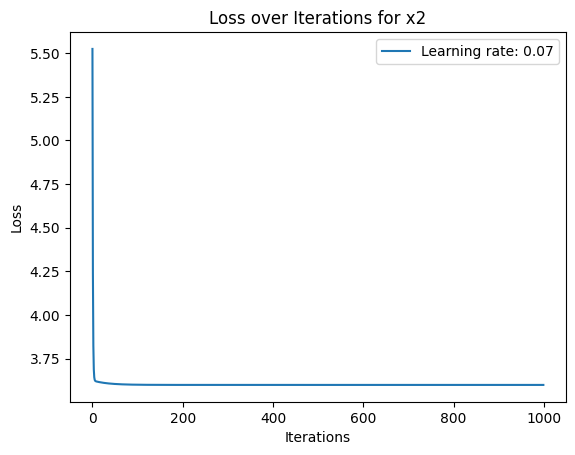

Learning rate: 0.01, Final theta: [0.68701995 0.57669462], Final cost: 3.599674193174967


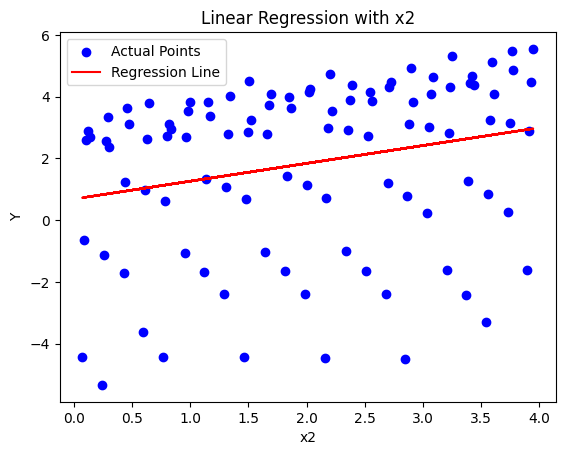

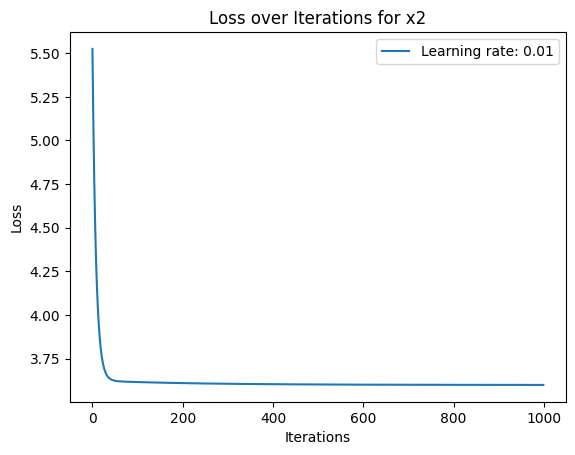

Learning rate: 0.1, Final theta: [ 2.8714221  -0.52048288], Final cost: 3.6294511246079155


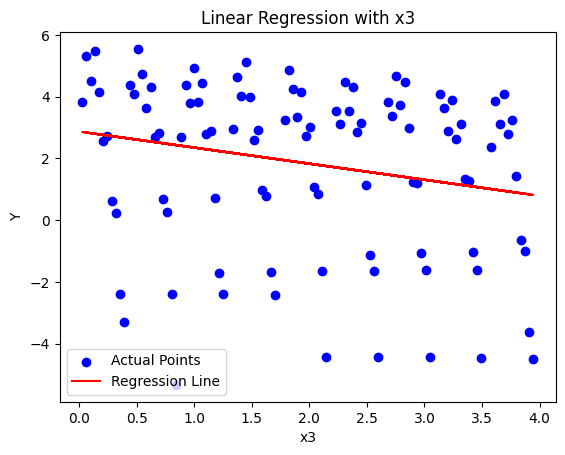

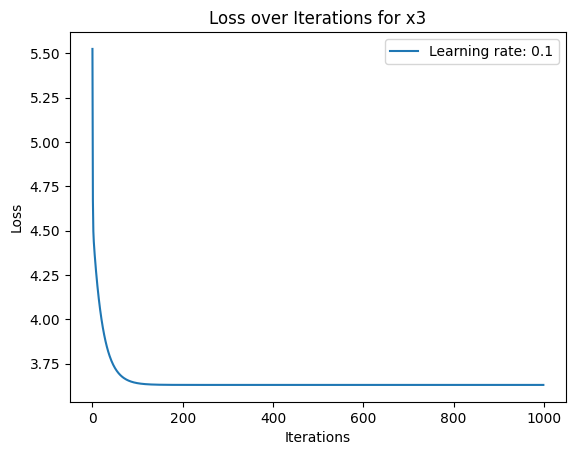

Learning rate: 0.07, Final theta: [ 2.87142176 -0.52048275], Final cost: 3.6294511246079324


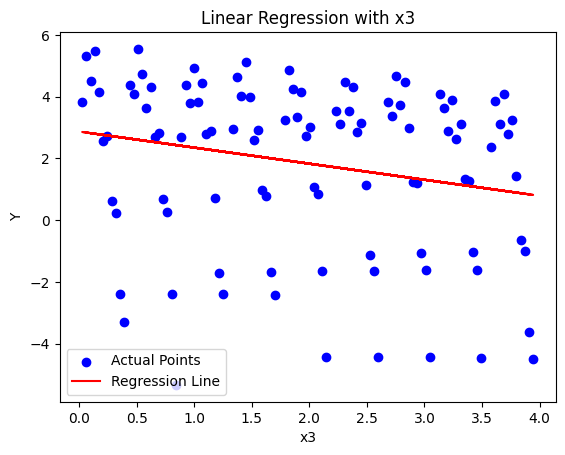

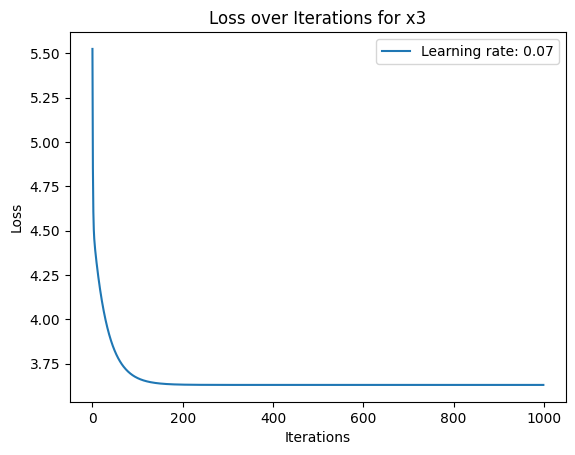

Learning rate: 0.01, Final theta: [ 2.59118664 -0.40965135], Final cost: 3.639706267299756


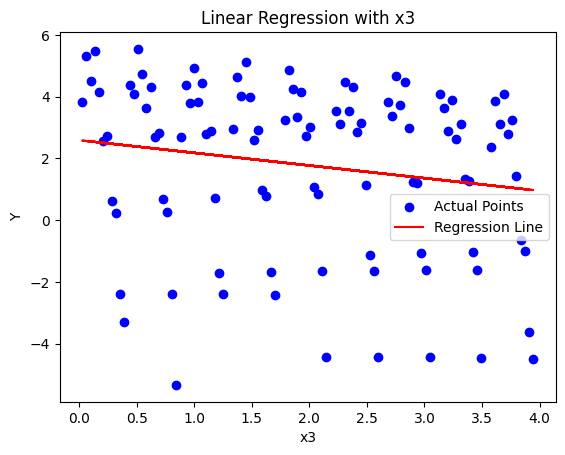

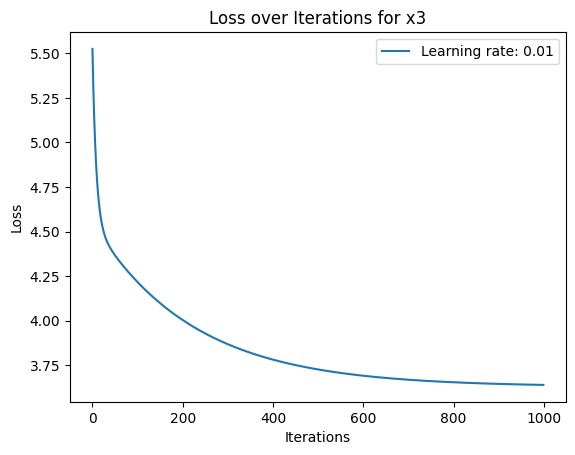


Summary of Linear Models:

Feature: x1, Learning rate: 0.1, Linear Model: Y = 5.9279489169790756 + -2.038336633229477*x1, Final cost: 0.9849930825405946
Feature: x1, Learning rate: 0.07, Linear Model: Y = 5.927947969786956 + -2.0383362645775205*x1, Final cost: 0.9849930825407129
Feature: x1, Learning rate: 0.01, Linear Model: Y = 5.2929472827573 + -1.7911907900332469*x1, Final cost: 1.0366648249472639
Feature: x2, Learning rate: 0.1, Linear Model: Y = 0.736060430011125 + 0.5576076103651677*x2, Final cost: 3.5993660181680416
Feature: x2, Learning rate: 0.07, Linear Model: Y = 0.7360603568225248 + 0.5576076388508517*x2, Final cost: 3.599366018168043
Feature: x2, Learning rate: 0.01, Linear Model: Y = 0.687019946445204 + 0.5766946227869244*x2, Final cost: 3.599674193174967
Feature: x3, Learning rate: 0.1, Linear Model: Y = 2.871422103633952 + -0.5204828841600001*x3, Final cost: 3.6294511246079155
Feature: x3, Learning rate: 0.07, Linear Model: Y = 2.8714217606748105 + -0.5204827485216084

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D3.csv')

# Extract columns
x1 = df.iloc[:, 0].values
x2 = df.iloc[:, 1].values
x3 = df.iloc[:, 2].values
y = df.iloc[:, 3].values

# Add a column of ones to include the intercept (theta0)
def add_intercept(x):
    return np.column_stack((np.ones(len(x)), x))

# Hypothesis function (Linear function)
def hypothesis(X, theta):
    return np.dot(X, theta)

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        prediction = hypothesis(X, theta)
        error = prediction - y
        gradient = (1/m) * np.dot(X.T, error)
        theta = theta - learning_rate * gradient
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return theta, cost_history

# Plotting function for regression
def plot_regression(X, y, theta, feature_name):
    plt.scatter(X[:, 1], y, color='blue', label='Actual Points')
    plt.plot(X[:, 1], hypothesis(X, theta), color='red', label='Regression Line')
    plt.title(f'Linear Regression with {feature_name}')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Plotting function for loss over iterations
def plot_loss(cost_history, learning_rate, feature_name):
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning rate: {learning_rate}')
    plt.title(f'Loss over Iterations for {feature_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to train for each feature, plot regression and loss
def train_and_plot(x, y, feature_name, learning_rates):
    X = add_intercept(x)
    models = []
    for lr in learning_rates:
        theta = np.zeros(2)  # Initialize theta to zeros (theta0, theta1)
        iterations = 1000
        theta, cost_history = gradient_descent(X, y, theta, lr, iterations)
        final_cost = cost_history[-1]  # Get the final cost after training
        models.append((theta, lr, final_cost))
        print(f'Learning rate: {lr}, Final theta: {theta}, Final cost: {final_cost}')
        plot_regression(X, y, theta, feature_name)
        plot_loss(cost_history, lr, feature_name)
    return models

# Define learning rates
learning_rates = [0.1, 0.07, 0.01]

# Dictionary to store models for x1, x2, x3
model_summary = {}

# Training and plotting for x1
model_summary['x1'] = train_and_plot(x1, y, 'x1', learning_rates)

# Training and plotting for x2
model_summary['x2'] = train_and_plot(x2, y, 'x2', learning_rates)

# Training and plotting for x3
model_summary['x3'] = train_and_plot(x3, y, 'x3', learning_rates)

# Printing the summary of the models
print("\nSummary of Linear Models:\n")
for feature, models in model_summary.items():
    for theta, lr, final_cost in models:
        print(f'Feature: {feature}, Learning rate: {lr}, Linear Model: Y = {theta[0]} + {theta[1]}*{feature}, Final cost: {final_cost}')


Learning rate: 0.1, Final theta: [ 5.31393577 -2.00368658  0.53260157 -0.26556795]


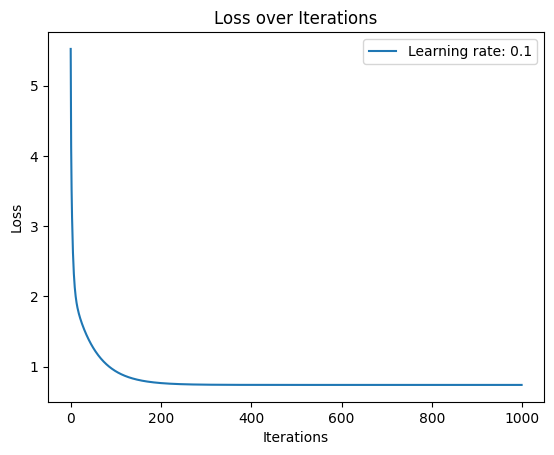

Learning rate: 0.07, Final theta: [ 5.30944412 -2.00305206  0.53334379 -0.26490956]


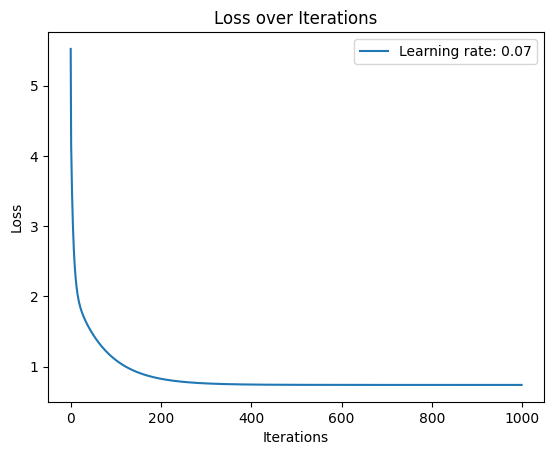

Learning rate: 0.01, Final theta: [ 3.39929705 -1.73320582  0.84898275  0.0150737 ]


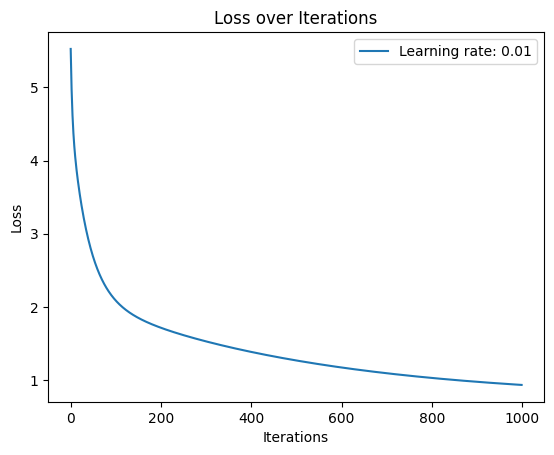


Best Linear Model (Learning rate: 0.1):
Y = 5.313935769531634 + -2.0036865792753904*x1 + 0.5326015740310899*x2 + -0.2655679465553415*x3

Predictions for new values:
For (X1, X2, X3) = (1, 1, 1): Predicted Y = 3.5772828177319917
For (X1, X2, X3) = (2, 0, 4): Predicted Y = 0.24429082475948682
For (X1, X2, X3) = (3, 2, 1): Predicted Y = 0.10251123321230082

Impact of Learning Rates on Final Loss and Number of Iterations:
Learning rate: 0.1, Final loss: 0.7384642444783824
Learning rate: 0.07, Final loss: 0.7384654465906959
Learning rate: 0.01, Final loss: 0.9341735848306766


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D3.csv')

# Extract columns
x1 = df.iloc[:, 0].values
x2 = df.iloc[:, 1].values
x3 = df.iloc[:, 2].values
y = df.iloc[:, 3].values

# Add a column of ones to include the intercept (theta0)
def add_intercept(X):
    return np.column_stack((np.ones(len(X)), X))

# Hypothesis function (Linear function)
def hypothesis(X, theta):
    return np.dot(X, theta)

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        prediction = hypothesis(X, theta)
        error = prediction - y
        gradient = (1/m) * np.dot(X.T, error)
        theta = theta - learning_rate * gradient
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return theta, cost_history

# Plotting function for loss over iterations
def plot_loss(cost_history, learning_rate):
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning rate: {learning_rate}')
    plt.title('Loss over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to train the model using all three explanatory variables
def train_model(X, y, learning_rates, iterations=1000):
    models = []
    for lr in learning_rates:
        theta = np.zeros(X.shape[1])  # Initialize theta to zeros (theta0, theta1, theta2, theta3)
        theta, cost_history = gradient_descent(X, y, theta, lr, iterations)
        models.append((theta, cost_history, lr))
        print(f'Learning rate: {lr}, Final theta: {theta}')
        plot_loss(cost_history, lr)
    return models

# Add intercept and combine x1, x2, x3 into a single matrix
X_all = add_intercept(np.column_stack((x1, x2, x3)))

# Define learning rates to explore between 0.1 and 0.01
learning_rates = [0.1, 0.07, 0.01]

# Train the model using all three explanatory variables and different learning rates
models = train_model(X_all, y, learning_rates)

# Find the best model based on the final loss
best_model = min(models, key=lambda m: m[1][-1])  # Select the model with the lowest final cost

# Report the final linear model found to be the best
best_theta = best_model[0]
best_lr = best_model[2]
print(f"\nBest Linear Model (Learning rate: {best_lr}):")
print(f"Y = {best_theta[0]} + {best_theta[1]}*x1 + {best_theta[2]}*x2 + {best_theta[3]}*x3")

# Predicting the value of y for new (X1, X2, X3) values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values_with_intercept = add_intercept(new_values)
predictions = hypothesis(new_values_with_intercept, best_theta)

# Print the predictions
print("\nPredictions for new values:")
for i, (x1_val, x2_val, x3_val) in enumerate(new_values):
    print(f"For (X1, X2, X3) = ({x1_val}, {x2_val}, {x3_val}): Predicted Y = {predictions[i]}")

# Describe the impact of different learning rates
def describe_impact_of_learning_rates(models):
    print("\nImpact of Learning Rates on Final Loss and Number of Iterations:")
    for model in models:
        theta, cost_history, lr = model
        print(f"Learning rate: {lr}, Final loss: {cost_history[-1]}")

# Describe the impact of different learning rates on the final loss and iterations
describe_impact_of_learning_rates(models)
